In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import torchvision as tv

cifar10_data = tv.datasets.CIFAR10('./data', train=True, download=True)

Files already downloaded and verified


In [3]:
data = cifar10_data.data / 255.0
data = data.reshape((data.shape[0], -1))
print(data.shape, type(data))
label = np.array(cifar10_data.targets)
print(label.shape)
feat_cols = ['pixel'+str(i) for i in range(data.shape[1])]
df = pd.DataFrame(data, columns=feat_cols)
df['y'] = label
df['label'] = df['y'].apply(lambda i: str(i))

np.random.seed(0)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols])


(50000, 3072) <class 'numpy.ndarray'>
(50000,)


/Users/aaron/.conda/envs/torch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aaron/.conda/envs/torch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


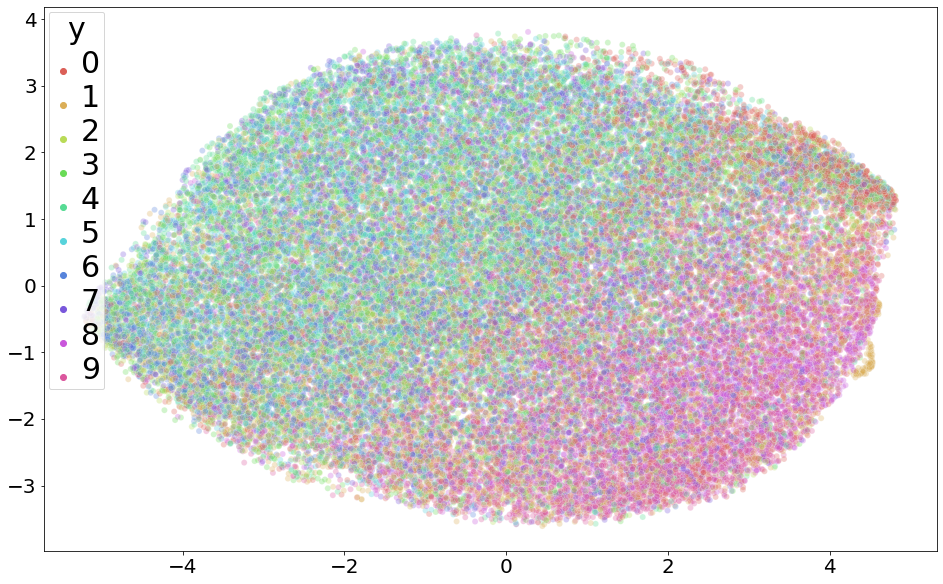

In [4]:
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
df['tsne-pca50-one'] = tsne_pca_results[:, 0]
df['tsne-pca50-two'] = tsne_pca_results[:, 1]
plt.figure(figsize=(16, 10))
ax = plt.subplot(1, 1, 1)
b = sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax
)
b.set_xlabel("", fontsize=30)
b.set_ylabel("", fontsize=30)
b.tick_params(labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='30')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='30')  # for legend title



plt.savefig(fname=f"cifar10_visuliazation.pdf")
